In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score



%matplotlib inline

data = pd.read_csv('data/kc_house_data.csv')

In [69]:
data.shape

(21597, 21)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [71]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [72]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [73]:
#fill NaN values waterfront columns with 0
#for waterfront, 0 means no waterfront view
values = {'waterfront':0}
data.fillna(value=values, inplace=True)

In [74]:
#drop columns deemed superfluous
data.drop(columns = ['id','date','view','lat','long', 'sqft_living15', 'sqft_lot15', 'yr_built'], inplace=True)

In [75]:
#eliminate properties valued at $200000 or less and luxury homes from data set, 
#luxury homes defined as $500,000 and over 
#dropped 10041 rows
data = data[(data.price < 500000) & (data.price > 200000)]

#eliminate properties with 6 or more bedrooms and 4 or more bathrooms which were outliers in the data
#dropped 110 rows
data = data[(data.bedrooms < 6) & (data.bathrooms < 4)]

#eliminate properties with less than a full bathroom (defined as shower, bathtub, toilet, & sink) as judged
#to be undesirable. 
#dropped 48 rows
data = data[(data.bathrooms >= 1)]

In [76]:
data.shape

(11398, 13)

In [77]:
data.sqft_lot.describe()

count     11398.000000
mean      11948.404720
std       27441.463041
min         572.000000
25%        5057.000000
50%        7500.000000
75%        9760.000000
max      542322.000000
Name: sqft_lot, dtype: float64

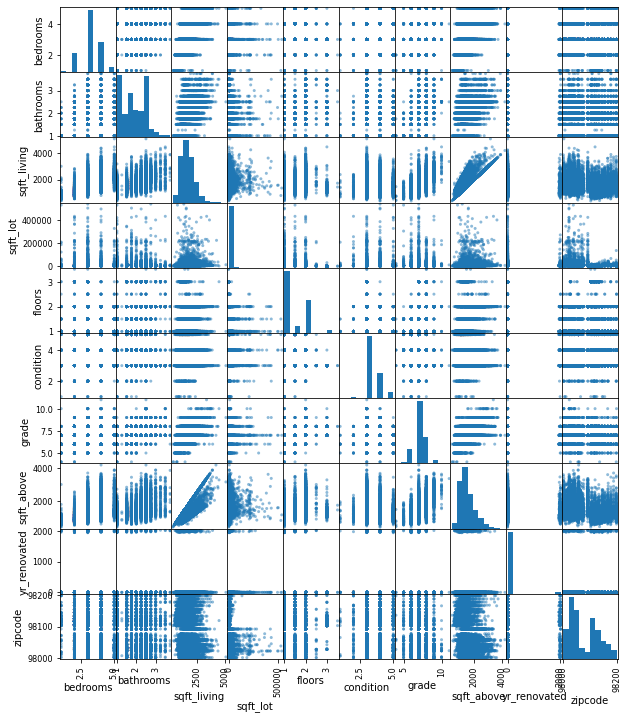

In [78]:
#scatter matrix for data, took out price (target), left out sqft_basement, yr_renovated, and waterfront
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'condition', 'grade','sqft_above', 
          'yr_renovated', 'zipcode']
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [79]:
#df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

#list the pairs with a high correlation, indicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.801744


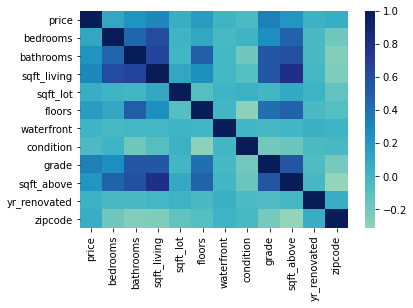

In [80]:
import seaborn as sns
sns.heatmap(data_pred.corr(), cmap="YlGnBu", center=0);

In [81]:
#change the value ? to string 0
data['sqft_basement'] = data['sqft_basement'].replace(['?'],'0')

#convert datatype of sqft_basement column to float
data = data.astype({'sqft_basement': float})

## First regression model - statsmodels only
### No changes were made to any features

In [82]:
#statsmodels regression model with unchanged predictors from scatter matrix 
outcome1 = 'price'
x_cols1 = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 
          'sqft_basement','sqft_above', 'yr_renovated', 'zipcode']
predictors1 = '+'.join(x_cols1)
formula1 = outcome1 + '~' + predictors1
model = ols(formula=formula1, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:08:31   Log-Likelihood:            -1.1800e+05
No. Observations:                9343   AIC:                         2.360e+05
Df Residuals:                    9330   BIC:                         2.361e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.011e+07   1.49e+06    -13.468      0.000    -2.3e+07   -1.72e+07
bedrooms      -9136.1744   1270.412     -7.192      0.000   -1.16e+04   -6645.890
bathrooms      -826.6534   1890.575     -0.437      0.662   -4532.594    2879.287
sqft_living      50.6567     14.765      3.431      0.001      21.715      79.598
sqft_lot          0.1774      0.027      6.467      0.000       0.124       0.231
floors         1.357e+04   2007.943      6.760      0.000    9637.686    1.75e+04
waterfront     3.984e+04    2.8e+04      1.423      0.155   -1.51e+04    9.47e+04
condition      4821.5183   1292.128      3.731      0.000    2288.666    7354.371
grade          2.717e+04   1334.258     20.363      0.000    2.46e+04    2.98e+04
sqft_basement    -2.4638     14.725     -0.167      0.867     -31.328      26.400
sqft_above      -25.1007     14.734     -1.704      0.088     -53.982       3.781
yr_renovated      8.2185      2.407      3.415      0.001       3.501      12.936
zipcode         206.0475     15.208     13.549      0.000     176.236     235.859
==============================================================================
Omnibus:                     1101.587   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.367
Skew:                           0.201   Prob(JB):                     1.37e-76
Kurtosis:                       2.143   Cond. No.                     1.93e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#create binary categorical columns for sqft_basement and yr_renovated 

#create boolean column for whether a property has a basement
data['has_base'] = np.where((data['sqft_basement'] > 0),1,0)
data.head()

#fill NaN values in yr_renovated column with 0
data['yr_renovated'].fillna(0, inplace=True)
data['yr_renovated'].unique()

#create boolean column for whether a property has been renovated
data['has_renov'] = np.where((data['yr_renovated'] > 0),1,0)

#drop those orginal features
data.drop(columns = ['sqft_basement', 'yr_renovated'], inplace=True)

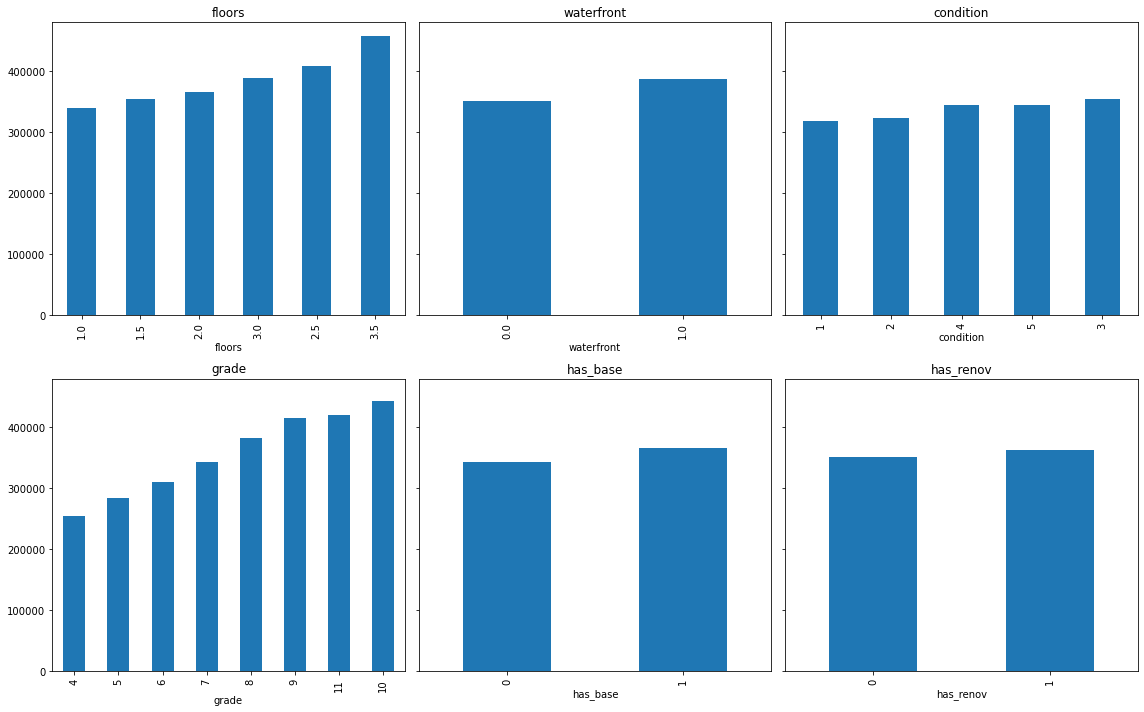

In [84]:
#create bar plots of categoricals: floors, waterfront, condition, grade, has_base, 
#and has_renov
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)
categoricals = ['floors', 'waterfront', 'condition', 'grade', 'has_base', 'has_renov']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)
        .mean()['price']
        .sort_values()
        .plot
        .bar(ax=ax))
    ax.set_title(col)
    
fig.tight_layout();


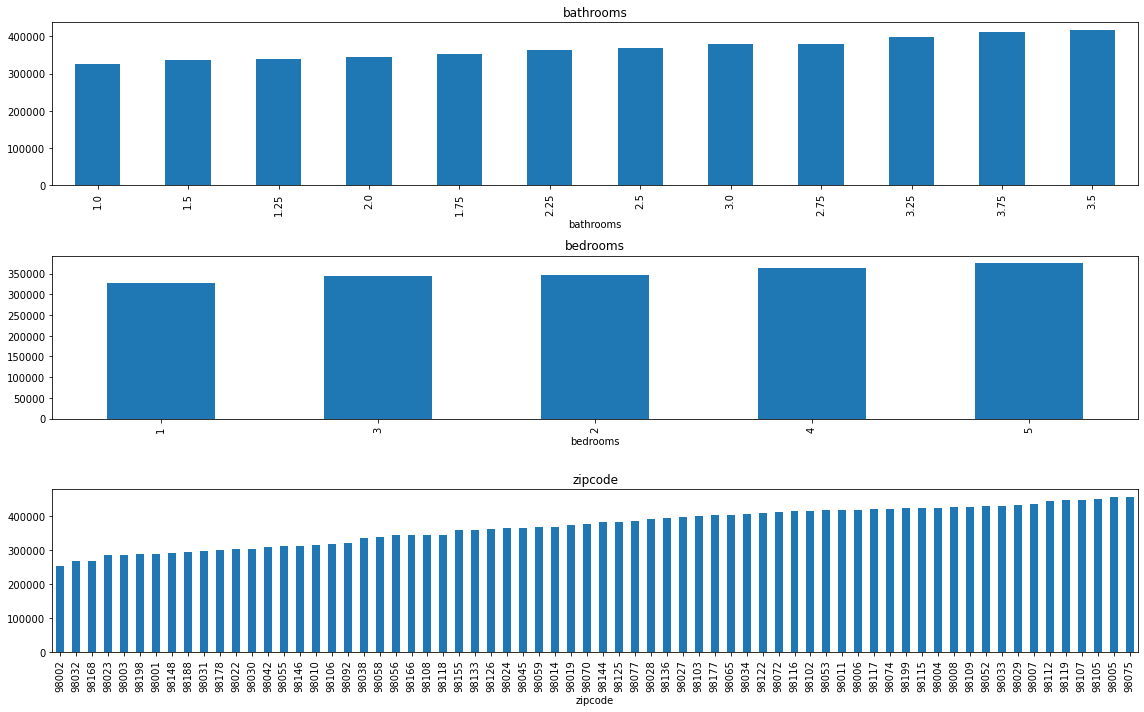

In [85]:
#create bar plots of categoricals: bathrooms, bedrooms, and zipcode
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,10))
categoricals = ['bathrooms', 'bedrooms','zipcode']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)
        .mean()['price']
        .sort_values()
        .plot
        .bar(ax=ax))
    ax.set_title(col)
    
fig.tight_layout();


In [86]:
#change values in floors columns to prepare for one hot encoding
def floor(value):
    if value == 1:
        return 1
    elif value == 1.5:
        return '1and_half'
    elif value == 2:
        return 2
    elif value == 2.5:
        return '2and_half'
    elif value == 3:
        return 3
    elif value == 3.5:
        return '3and_half'
       
data.floors = data.floors.apply(floor)

#dealing with the bathrooms predictor
#change values in bathrooms column to prepare for one hot encoding
def baths(value):
    if value == 1:
        return 1
    elif value < 2:
        return '1and_quart_plus'
    elif value == 2:
        return 2
    elif value < 3:
        return '2and_quart_plus'
    elif value == 3:
        return 3
    elif value > 3:
        return '3and_quart_plus'
data.bathrooms = data.bathrooms.apply(baths)

In [87]:
#convert datatype of columns bedrooms, bathrooms, floors, condition, zipcode, and 
#grade to prepare for one hot encoding
convert_dict = {'bedrooms': str, 'bathrooms': str, 'floors': str, 'condition':str, 'zipcode': str, 
                'grade': str}
data = data.astype(convert_dict)

#create dummy variables for categoricals bedrooms, bathrooms, floors, condition, and grade
bedrooms_dum = pd.get_dummies(data['bedrooms'], prefix='bed', drop_first=True)
bathrooms_dum = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)
floors_dum = pd.get_dummies(data['floors'], prefix='fl', drop_first=True)
condition_dum = pd.get_dummies(data['condition'], prefix='cond', drop_first=True)
zip_dum = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)
grade_dum = pd.get_dummies(data['grade'], prefix='gr', drop_first=True)

#remove orignial columns of dummy variables, add dummy columns
data = data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'zipcode', 'grade'], axis=1)
data = pd.concat([data, bedrooms_dum, bathrooms_dum, floors_dum, condition_dum, zip_dum, grade_dum], axis=1)
data.head()

,price,sqft_living,sqft_lot,waterfront,sqft_above,has_base,has_renov,bed_2,bed_3,bed_4,...,zip_98188,zip_98198,zip_98199,gr_11,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9
0,221900.0,1180,5650,0.0,1180,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,257500.0,1715,6819,0.0,1715,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,291850.0,1060,9711,0.0,1060,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
8,229500.0,1780,7470,0.0,1050,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,323000.0,1890,6560,0.0,1890,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
#recheck collinearity as have changed features
#df to look for collinearity in predictors via correlation matrix pairing
data_pred = data.copy()
data_pred.corr()
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new 
#column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

#list the pairs with a high correlation, indicating collinearity
df[(df.cc > 0.75) & (df.cc < 1)]

,cc
pairs,
"(cond_3, cond_4)",0.841532
"(sqft_above, sqft_living)",0.801744


In [89]:
#dropping features: sqft_above for collinearity with sqft_living and cond_3 for 
#collinearity with cond_4
data.drop(['sqft_above', 'cond_3'], axis=1, inplace=True)


In [90]:
data.shape

(11398, 97)

## Second regression model - statsmodels and sklearn
### Binary categoricals have their columns, categoricals have been dummied, dropped sqft_above and cond_3 for collinearity

In [91]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = data.price
X = data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 9118 rows and 96 columns
y_train is a Series with 9118 values
The training mean squared error:  2202441826.2611976
The test mean squared error:  2473125824.2527137
The training RSME:  46930.180334846336
The test RSME:  49730.53211310647


In [92]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     185.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:10:19   Log-Likelihood:            -1.1101e+05
No. Observations:                9118   AIC:                         2.222e+05
Df Residuals:                    9021   BIC:                         2.229e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.083e+05   1.21e+04     17.175      0.000    1.85e+05    2.32e+05
sqft_living             62.1531      1.543     40.284      0.000      59.129      65.177
sqft_lot                 0.3002      0.020     14.893      0.000       0.261       0.340
waterfront            5.235e+04   1.86e+04      2.811      0.005    1.58e+04    8.89e+04
has_base             -5786.7061   1331.023     -4.348      0.000   -8395.814   -3177.598
has_renov             1.088e+04   3453.897      3.150      0.002    4108.515    1.76e+04
bed_2                 6521.5311   5141.513      1.268      0.205   -3557.002    1.66e+04
bed_3                 5237.2190   5171.969      1.013      0.311   -4901.014    1.54e+04
bed_4                 6506.3856   5337.328      1.219      0.223   -3955.989     1.7e+04
bed_5                -2580.5413   5847.923     -0.441      0.659    -1.4e+04    8882.716
bath_1and_quart_plus  4196.5833   1669.442      2.514      0.012     924.098    7469.069
bath_2                5109.6980   2057.135      2.484      0.013    1077.247    9142.149
bath_2and_quart_plus  1.684e+04   2163.653      7.782      0.000    1.26e+04    2.11e+04
bath_3                1.245e+04   4151.548      3.000      0.003    4315.534    2.06e+04
bath_3and_quart_plus  1.833e+04   4494.931      4.078      0.000    9521.395    2.71e+04
fl_1and_half          3396.9572   2081.101      1.632      0.103    -682.473    7476.387
fl_2                 -7319.6183   1699.533     -4.307      0.000   -1.07e+04   -3988.148
fl_2and_half           129.8694   1.05e+04      0.012      0.990   -2.05e+04    2.08e+04
fl_3                 -3.971e+04   3699.711    -10.734      0.000    -4.7e+04   -3.25e+04
fl_3and_half         -1.368e+04   4.75e+04     -0.288      0.773   -1.07e+05    7.95e+04
cond_2               -1.282e+04   5657.018     -2.266      0.023   -2.39e+04   -1727.769
cond_4                8816.4287   1236.699      7.129      0.000    6392.218    1.12e+04
cond_5                1.927e+04   2162.642      8.910      0.000     1.5e+04    2.35e+04
zip_98002            -8617.6792   5479.783     -1.573      0.116   -1.94e+04    2123.939
zip_98003             7237.3092   4672.045      1.549      0.121   -1920.959    1.64e+04
zip_98004             1.855e+05   4.76e+04      3.894      0.000    9.21e+04    2.79e+05
zip_98005             1.915e+05   1.81e+04     10.561      0.000    1.56e+05    2.27e+05
zip_98006             1.543e+05   7044.962     21.905      0.000    1.41e+05    1.68e+05
zip_98007             1.792e+05   7850.011     22.824      0.000    1.64e+05    1.95e+05
zip_98008             1.804e+05   6525.077     27.640      0.000    1.68e+05    1.93e+05
zip_98010             3.408e+04   8014.250      4.253      0.000    1.84e+04    4.98e+04
zip_98011             1.398e+05   5710.039     24.480    

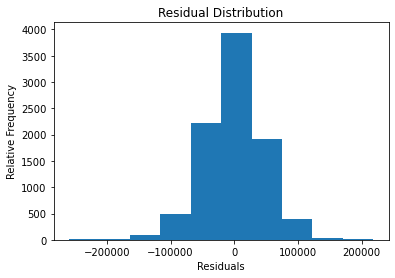

In [93]:
plt.hist(model.resid);
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Relative Frequency');

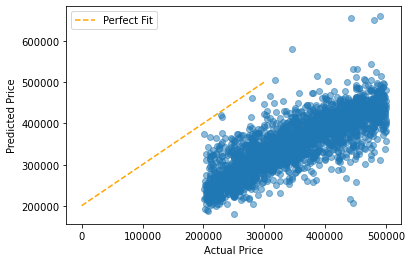

In [94]:
preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

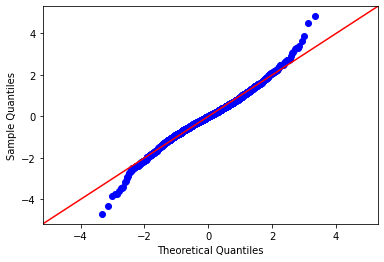

In [95]:
import statsmodels.api as sm
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [96]:
data.describe()

,price,sqft_living,sqft_lot,waterfront,has_base,has_renov,bed_2,bed_3,bed_4,bed_5,...,zip_98188,zip_98198,zip_98199,gr_11,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9
count,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,...,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000,11398.000000
mean,350742.136778,1697.943411,11948.404720,0.000702,0.331111,0.021758,0.159151,0.529654,0.254694,0.046412,...,0.009037,0.018249,0.005176,0.000088,0.000526,0.011318,0.132128,0.570802,0.246359,0.036234
std,81016.746626,566.206295,27441.463041,0.026485,0.470633,0.145899,0.365833,0.499142,0.435708,0.210384,...,0.094635,0.133856,0.071764,0.009367,0.022939,0.105786,0.338645,0.494983,0.430909,0.186881
min,200126.000000,390.000000,572.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281125.000000,1280.000000,5057.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349950.000000,1630.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,420000.000000,2050.000000,9760.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,499990.000000,5067.000000,542322.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


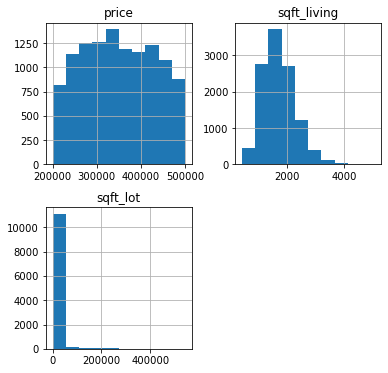

In [98]:
data[['price', 'sqft_living', 'sqft_lot']].hist(figsize=(6,6));

In [99]:
#eliminate outliers in sqft_lot
data = data[(data.sqft_lot > 1000) & (data.sqft_lot < 20000)]

array([[<AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

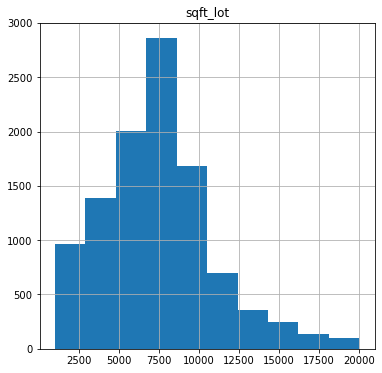

In [100]:
data[['sqft_lot']].hist(figsize=(6,6))

In [101]:
data.shape

(10440, 97)

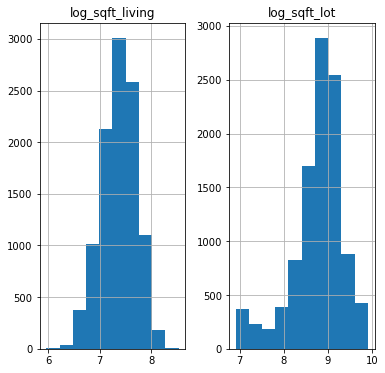

In [102]:
#log transform sqft_living and sqft_lot
data_log = pd.DataFrame([])
data_log['log_sqft_living'] = np.log(data['sqft_living'])
data_log['log_sqft_lot'] = np.log(data['sqft_lot'])

data_log[['log_sqft_living', 'log_sqft_lot']].hist(figsize=(6,6));

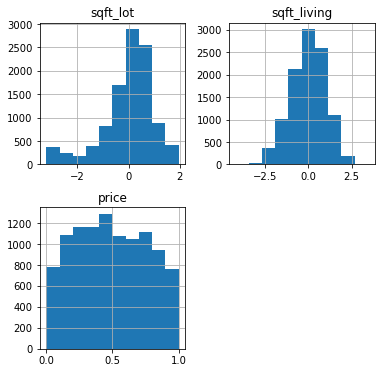

In [103]:
#scale price, sqft_lot and sqftliving_log
price = data['price']
sqft_lot = data_log['log_sqft_lot']
sqft_living = data_log['log_sqft_living']


scaled_price = (price - min(price)) / (max(price) - min(price))
scaled_sqftlot = (sqft_lot - np.mean(sqft_lot) )/ np.sqrt(np.var(sqft_lot))
scaled_sqftliving = (sqft_living - np.mean(sqft_living)) / np.sqrt(np.var(sqft_living))

#df with scaled features only
data_scaled = pd.DataFrame([])
data_scaled['sqft_lot'] = scaled_sqftlot
data_scaled['sqft_living'] = scaled_sqftliving
data_scaled['price'] = scaled_price

data_scaled.hist(figsize=(6,6));

In [104]:
#df to add log and scaled sqft_lot and sqft_living
scaled_df = data.copy()

#drop original price, sqft_lot and sqft_living
scaled_df.drop(['price', 'sqft_lot', 'sqft_living'], axis=1, inplace=True)

#concat log and scaled sqft_lot and sqft_living
scaled_df = pd.concat([scaled_df, data_scaled], axis=1)
scaled_df

,waterfront,has_base,has_renov,bed_2,bed_3,bed_4,bed_5,bath_1and_quart_plus,bath_2,bath_2and_quart_plus,...,gr_11,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9,sqft_lot,sqft_living,price
0,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,-0.225508,-0.892453,0.072613
6,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0.099343,0.218532,0.191333
7,0.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0.710062,-1.211118,0.305885
8,0.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.256852,0.329067,0.097958
9,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0.032454,0.507240,0.409766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,0.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,-3.011790,-0.199350,0.763259
21591,0.0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,-2.771565,-0.581909,0.916662
21592,0.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,-3.004137,-0.120634,0.533155
21593,0.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,-0.176379,1.103504,0.666549


## Third regression model - statsmodels & sklearn
### price min/max scaled, log transform & normalize sqft_living & sqft_lot

In [130]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = scaled_df.price
X = scaled_df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model_linReg = LinearRegression()
model_linReg.fit(X_train, y_train)

y_hat_train = model_linReg.predict(X_train)
y_hat_test = model_linReg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 96 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023292434194938646
The test mean squared error:  0.023479865241474735
The training RSME:  0.15261859059412994
The test RSME:  0.153231410753392


In [131]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model_ols = ols(formula=formula, data=features).fit()

model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:43:08   Log-Likelihood:                 3849.2
No. Observations:                8352   AIC:                            -7504.
Df Residuals:                    8255   BIC:                            -6823.
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4627      0.042     10.999      0.000       0.380       0.545
waterfront               0.0582      0.094      0.619      0.536      -0.126       0.243
has_base                -0.0164      0.005     -3.426      0.001      -0.026      -0.007
has_renov                0.0302      0.012      2.509      0.012       0.007       0.054
bed_2                    0.0030      0.018      0.162      0.871      -0.033       0.039
bed_3                   -0.0166      0.019     -0.896      0.370      -0.053       0.020
bed_4                   -0.0039      0.019     -0.203      0.839      -0.042       0.034
bed_5                   -0.0245      0.021     -1.171      0.242      -0.065       0.016
bath_1and_quart_plus     0.0062      0.006      1.073      0.283      -0.005       0.017
bath_2                   0.0030      0.007      0.430      0.667      -0.011       0.017
bath_2and_quart_plus     0.0479      0.008      6.361      0.000       0.033       0.063
bath_3                   0.0370      0.014      2.666      0.008       0.010       0.064
bath_3and_quart_plus     0.0633      0.016      4.053      0.000       0.033       0.094
fl_1and_half            -0.0029      0.007     -0.398      0.690      -0.017       0.011
fl_2                     0.0063      0.007      0.972      0.331      -0.006       0.019
fl_2and_half             0.0247      0.035      0.697      0.486      -0.045       0.094
fl_3                    -0.0712      0.015     -4.864      0.000      -0.100      -0.042
fl_3and_half             0.3192      0.154      2.069      0.039       0.017       0.622
cond_2                  -0.0358      0.020     -1.785      0.074      -0.075       0.004
cond_4                   0.0287      0.004      6.788      0.000       0.020       0.037
cond_5                   0.0657      0.007      9.038      0.000       0.051       0.080
zip_98002               -0.0088      0.019     -0.468      0.639      -0.046       0.028
zip_98003                0.0135      0.016      0.838      0.402      -0.018       0.045
zip_98004                0.5987      0.155      3.857      0.000       0.294       0.903
zip_98005                0.7022      0.064     11.003      0.000       0.577       0.827
zip_98006                0.5351      0.024     22.311      0.000       0.488       0.582
zip_98007                0.6242      0.028     21.998      0.000       0.569       0.680
zip_98008                0.6125      0.021     28.762      0.000       0.571       0.654
zip_98010                0.1170      0.030      3.915      0.000       0.058       0.176
zip_98011                0.4741      0.020     23.821      0.000       0.435       0.513
zip_98014                0.2895      0.028     10.342      0.000       0.235       0.344
zip_98019                0.3325      0.020     16.758    

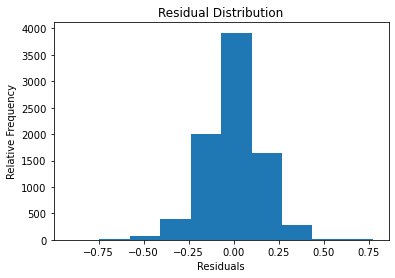

In [132]:
plt.hist(model.resid);
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Relative Frequency');

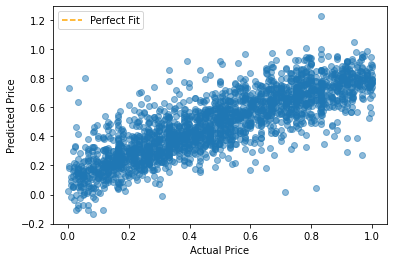

In [133]:
preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

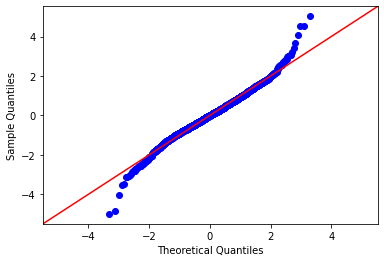

In [134]:
import statsmodels.api as sm
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [137]:
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(model_linReg, X, y, cv=5, scoring=mse)

In [138]:
cv_5_results.mean()

2.008602408033076e+19

## Fourth regression model - statsmodels and sklearn
### eliminate zipcodes with high p-values and confidence levels spanning 0

In [46]:
z_list = ['zip_98002', 'zip_98003', 'zip_98022', 'zip_98023', 'zip_98032', 'zip_98092']
dropped_z = scaled_df.copy()
dropped_z.drop(z_list, axis=1, inplace=True)

In [47]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = dropped_z.price
X = dropped_z.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 90 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023348194089643125
The test mean squared error:  0.02345989968892914
The training RSME:  0.15280115866590516
The test RSME:  0.15316624853057262


In [48]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     197.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:47:16   Log-Likelihood:                 3839.2
No. Observations:                8352   AIC:                            -7496.
Df Residuals:                    8261   BIC:                            -6857.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4498      0.039     11.584      0.000       0.374       0.526
waterfront               0.0264      0.112      0.235      0.814      -0.194       0.247
has_base                -0.0125      0.005     -2.621      0.009      -0.022      -0.003
has_renov                0.0358      0.012      2.959      0.003       0.012       0.060
bed_2                   -0.0136      0.019     -0.722      0.470      -0.050       0.023
bed_3                   -0.0363      0.019     -1.901      0.057      -0.074       0.001
bed_4                   -0.0228      0.020     -1.155      0.248      -0.061       0.016
bed_5                   -0.0436      0.021     -2.048      0.041      -0.085      -0.002
bath_1and_quart_plus     0.0058      0.006      1.010      0.313      -0.006       0.017
bath_2                   0.0071      0.007      0.981      0.327      -0.007       0.021
bath_2and_quart_plus     0.0493      0.008      6.509      0.000       0.034       0.064
bath_3                   0.0395      0.014      2.853      0.004       0.012       0.067
bath_3and_quart_plus     0.0537      0.016      3.377      0.001       0.023       0.085
fl_1and_half             0.0008      0.007      0.105      0.916      -0.013       0.015
fl_2                     0.0093      0.007      1.423      0.155      -0.004       0.022
fl_2and_half             0.0272      0.037      0.724      0.469      -0.046       0.101
fl_3                    -0.0604      0.015     -4.137      0.000      -0.089      -0.032
fl_3and_half             0.3099      0.154      2.007      0.045       0.007       0.613
cond_2                  -0.0294      0.019     -1.524      0.128      -0.067       0.008
cond_4                   0.0245      0.004      5.824      0.000       0.016       0.033
cond_5                   0.0626      0.007      8.447      0.000       0.048       0.077
zip_98004                0.5953      0.155      3.841      0.000       0.291       0.899
zip_98005                0.7077      0.063     11.229      0.000       0.584       0.831
zip_98006                0.5322      0.022     24.528      0.000       0.490       0.575
zip_98007                0.6259      0.027     22.979      0.000       0.573       0.679
zip_98008                0.6208      0.018     33.605      0.000       0.585       0.657
zip_98010                0.1225      0.028      4.351      0.000       0.067       0.178
zip_98011                0.4884      0.017     29.256      0.000       0.456       0.521
zip_98014                0.2984      0.028     10.775      0.000       0.244       0.353
zip_98019                0.3403      0.017     19.878      0.000       0.307       0.374
zip_98024                0.3479      0.035      9.994      0.000       0.280       0.416
zip_98027                0.5224      0.021     25.016    

## Fifth regression model - statsmodels and sklearn
### eliminate gr_9 & gr_11 for continued & increased high p-values and confidence levels spanning 0 from 4th regression

In [49]:
drop_gr = dropped_z.copy()
drop_gr.drop(['gr_9', 'gr_11'], axis=1, inplace=True)

In [50]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = drop_gr.price
X = drop_gr.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 88 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023695201692648195
The test mean squared error:  0.022114353139203933
The training RSME:  0.15393245821673932
The test RSME:  0.148708954468801


In [51]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:47:33   Log-Likelihood:                 3777.6
No. Observations:                8352   AIC:                            -7377.
Df Residuals:                    8263   BIC:                            -6752.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4178      0.022     19.351      0.000       0.376       0.460
waterfront               0.0661      0.094      0.705      0.481      -0.118       0.250
has_base                -0.0148      0.005     -3.064      0.002      -0.024      -0.005
has_renov                0.0323      0.012      2.696      0.007       0.009       0.056
bed_2                   -0.0226      0.018     -1.221      0.222      -0.059       0.014
bed_3                   -0.0405      0.019     -2.154      0.031      -0.077      -0.004
bed_4                   -0.0331      0.019     -1.707      0.088      -0.071       0.005
bed_5                   -0.0577      0.021     -2.742      0.006      -0.099      -0.016
bath_1and_quart_plus     0.0020      0.006      0.350      0.726      -0.009       0.014
bath_2                   0.0008      0.007      0.111      0.912      -0.013       0.015
bath_2and_quart_plus     0.0466      0.008      6.087      0.000       0.032       0.062
bath_3                   0.0514      0.014      3.637      0.000       0.024       0.079
bath_3and_quart_plus     0.0583      0.016      3.630      0.000       0.027       0.090
fl_1and_half             0.0032      0.008      0.432      0.666      -0.011       0.018
fl_2                     0.0097      0.007      1.467      0.142      -0.003       0.023
fl_2and_half             0.0275      0.041      0.670      0.503      -0.053       0.108
fl_3                    -0.0707      0.015     -4.701      0.000      -0.100      -0.041
fl_3and_half             0.1439      0.110      1.304      0.192      -0.072       0.360
cond_2                  -0.0372      0.019     -1.917      0.055      -0.075       0.001
cond_4                   0.0247      0.004      5.805      0.000       0.016       0.033
cond_5                   0.0692      0.008      9.194      0.000       0.054       0.084
zip_98004                0.6102      0.156      3.909      0.000       0.304       0.916
zip_98005                0.7259      0.090      8.089      0.000       0.550       0.902
zip_98006                0.5441      0.021     25.338      0.000       0.502       0.586
zip_98007                0.6562      0.026     24.941      0.000       0.605       0.708
zip_98008                0.6141      0.018     33.815      0.000       0.578       0.650
zip_98010                0.0988      0.029      3.435      0.001       0.042       0.155
zip_98011                0.4822      0.017     28.389      0.000       0.449       0.516
zip_98014                0.3212      0.029     11.171      0.000       0.265       0.378
zip_98019                0.3310      0.017     19.092      0.000       0.297       0.365
zip_98024                0.4010      0.038     10.557      0.000       0.327       0.475
zip_98027                0.5209      0.021     25.102    

## Sixth regression model - statsmodels and sklearn
### eliminate bed_2, bath_1and_quart_plus, bath_2, cond_2 for continued & increased high p-values and confidence levels spanning 0 from 5th regression

In [52]:
more_drops = drop_gr.copy()
more_drops.drop(['bed_2', 'bath_1and_quart_plus', 'bath_2', 'cond_2'], axis=1, inplace=True)

In [53]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = more_drops.price
X = more_drops.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 84 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023013909694825606
The test mean squared error:  0.024911416888465925
The training RSME:  0.15170336085540626
The test RSME:  0.15783351003024018


In [54]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:47:52   Log-Likelihood:                 3899.5
No. Observations:                8352   AIC:                            -7629.
Df Residuals:                    8267   BIC:                            -7031.
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3902      0.012     32.410      0.000       0.367       0.414
waterfront               0.0551      0.111      0.498      0.618      -0.162       0.272
has_base                -0.0162      0.005     -3.433      0.001      -0.025      -0.007
has_renov                0.0356      0.012      2.903      0.004       0.012       0.060
bed_3                   -0.0221      0.006     -3.874      0.000      -0.033      -0.011
bed_4                   -0.0116      0.007     -1.615      0.106      -0.026       0.002
bed_5                   -0.0310      0.011     -2.908      0.004      -0.052      -0.010
bath_2and_quart_plus     0.0470      0.005      8.824      0.000       0.037       0.057
bath_3                   0.0455      0.013      3.587      0.000       0.021       0.070
bath_3and_quart_plus     0.0622      0.014      4.377      0.000       0.034       0.090
fl_1and_half             0.0003      0.007      0.039      0.969      -0.014       0.014
fl_2                     0.0076      0.007      1.166      0.244      -0.005       0.020
fl_2and_half             0.0307      0.036      0.850      0.396      -0.040       0.102
fl_3                    -0.0780      0.015     -5.296      0.000      -0.107      -0.049
fl_3and_half             0.3186      0.153      2.079      0.038       0.018       0.619
cond_4                   0.0276      0.004      6.588      0.000       0.019       0.036
cond_5                   0.0695      0.007      9.720      0.000       0.055       0.084
zip_98004                0.5741      0.153      3.761      0.000       0.275       0.873
zip_98005                0.7445      0.076      9.742      0.000       0.595       0.894
zip_98006                0.5375      0.021     25.630      0.000       0.496       0.579
zip_98007                0.6525      0.026     25.517      0.000       0.602       0.703
zip_98008                0.6247      0.018     34.543      0.000       0.589       0.660
zip_98010                0.1157      0.027      4.211      0.000       0.062       0.170
zip_98011                0.4758      0.017     27.246      0.000       0.442       0.510
zip_98014                0.3033      0.026     11.687      0.000       0.252       0.354
zip_98019                0.3335      0.017     19.933      0.000       0.301       0.366
zip_98024                0.3704      0.040      9.306      0.000       0.292       0.448
zip_98027                0.5053      0.021     23.720      0.000       0.464       0.547
zip_98028                0.4047      0.014     29.428      0.000       0.378       0.432
zip_98029                0.5946      0.019     30.644      0.000       0.557       0.633
zip_98030                0.0464      0.012      3.807      0.000       0.023       0.070
zip_98031                0.0519      0.012      4.459    

## Seventh regression model - statsmodels and sklearn
### eliminate fl_1and_half, fl_2and_half, & waterfront for continued & increased high p-values and confidence levels spanning 0 from 5th regression

In [55]:
more_drops.drop(['waterfront','fl_1and_half', 'fl_2and_half'], axis=1, inplace=True)
more_drops

,has_base,has_renov,bed_3,bed_4,bed_5,bath_2and_quart_plus,bath_3,bath_3and_quart_plus,fl_2,fl_3,...,zip_98198,zip_98199,gr_4,gr_5,gr_6,gr_7,gr_8,sqft_lot,sqft_living,price
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.225508,-0.892453,0.072613
6,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0.099343,0.218532,0.191333
7,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0.710062,-1.211118,0.305885
8,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.256852,0.329067,0.097958
9,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0.032454,0.507240,0.409766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,-3.011790,-0.199350,0.763259
21591,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,-2.771565,-0.581909,0.916662
21592,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,-3.004137,-0.120634,0.533155
21593,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,-0.176379,1.103504,0.666549


In [56]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = more_drops.price
X = more_drops.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 81 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023841119441965528
The test mean squared error:  0.021667659764249215
The training RSME:  0.1544056975696348
The test RSME:  0.1471993877848995


In [57]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     210.6
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:48:15   Log-Likelihood:                 3752.0
No. Observations:                8352   AIC:                            -7340.
Df Residuals:                    8270   BIC:                            -6764.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3979      0.012     32.827      0.000       0.374       0.422
has_base                -0.0166      0.005     -3.592      0.000      -0.026      -0.008
has_renov                0.0386      0.012      3.209      0.001       0.015       0.062
bed_3                   -0.0242      0.006     -4.188      0.000      -0.035      -0.013
bed_4                   -0.0131      0.007     -1.809      0.070      -0.027       0.001
bed_5                   -0.0333      0.011     -3.112      0.002      -0.054      -0.012
bath_2and_quart_plus     0.0435      0.005      7.959      0.000       0.033       0.054
bath_3                   0.0360      0.013      2.871      0.004       0.011       0.061
bath_3and_quart_plus     0.0645      0.015      4.430      0.000       0.036       0.093
fl_2                     0.0116      0.006      1.807      0.071      -0.001       0.024
fl_3                    -0.0613      0.015     -4.144      0.000      -0.090      -0.032
fl_3and_half             0.1553      0.111      1.404      0.160      -0.061       0.372
cond_4                   0.0264      0.004      6.219      0.000       0.018       0.035
cond_5                   0.0646      0.007      8.737      0.000       0.050       0.079
zip_98004                0.5713      0.155      3.678      0.000       0.267       0.876
zip_98005                0.7050      0.064     11.090      0.000       0.580       0.830
zip_98006                0.5522      0.022     25.202      0.000       0.509       0.595
zip_98007                0.5948      0.026     22.562      0.000       0.543       0.646
zip_98008                0.6218      0.018     34.205      0.000       0.586       0.657
zip_98010                0.1004      0.028      3.543      0.000       0.045       0.156
zip_98011                0.4893      0.017     29.337      0.000       0.457       0.522
zip_98014                0.3072      0.028     11.000      0.000       0.252       0.362
zip_98019                0.3277      0.017     18.867      0.000       0.294       0.362
zip_98024                0.3764      0.040      9.306      0.000       0.297       0.456
zip_98027                0.5257      0.022     23.500      0.000       0.482       0.570
zip_98028                0.4015      0.015     27.579      0.000       0.373       0.430
zip_98029                0.5803      0.019     29.916      0.000       0.542       0.618
zip_98030                0.0386      0.013      3.076      0.002       0.014       0.063
zip_98031                0.0506      0.012      4.211      0.000       0.027       0.074
zip_98033                0.6194      0.019     32.074      0.000       0.582       0.657
zip_98034                0.5118      0.010     49.616      0.000       0.492       0.532
zip_98038                0.1460      0.010     15.010    

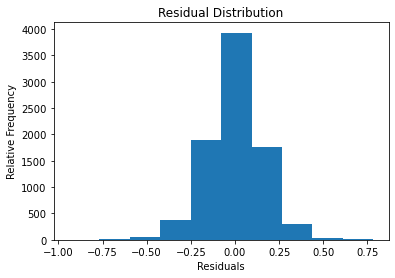

In [58]:
plt.hist(model.resid);
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Relative Frequency');

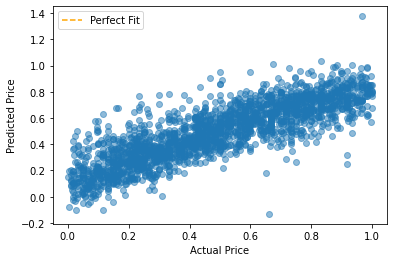

In [59]:
preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

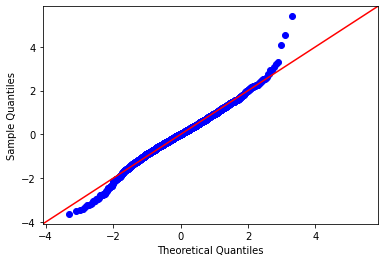

In [60]:
import statsmodels.api as sm
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

## Eighth regression model - statsmodels and sklearn
### eliminate bed_4, fl_2, & fl_3and_half for continued & increased high p-values and confidence levels spanning 0 from 5th regression

In [61]:
more_drops.drop(['bed_4','fl_2', 'fl_3and_half'], axis=1, inplace=True)

In [125]:
data

,price,sqft_living,sqft_lot,waterfront,has_base,has_renov,bed_2,bed_3,bed_4,bed_5,...,zip_98188,zip_98198,zip_98199,gr_11,gr_4,gr_5,gr_6,gr_7,gr_8,gr_9
0,221900.0,1180,5650,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,257500.0,1715,6819,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,291850.0,1060,9711,0.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
8,229500.0,1780,7470,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,323000.0,1890,6560,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,429000.0,1490,1126,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
21591,475000.0,1310,1294,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
21592,360000.0,1530,1131,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,2310,5813,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
#model with categoricals - both dummied and binary - and collinear feature sqft_above dropped
#train-test split, model with scikit-learn
y = more_drops.price
X = more_drops.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('The training mean squared error: ',train_mse)
print('The test mean squared error: ',test_mse)

print('The training RSME: ',train_mse**0.5)
print('The test RSME: ',test_mse**0.5)

X_train is a DataFrame with 8352 rows and 78 columns
y_train is a Series with 8352 values
The training mean squared error:  0.023337030154781266
The test mean squared error:  0.023755991715748225
The training RSME:  0.15276462337459307
The test RSME:  0.15412978854117793


In [63]:
#model using statsmodels
features = X_train.copy()
features['price'] = y_train

formula = 'price~' + '+'.join(X_train.columns)
model = ols(formula=formula, data=features).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     226.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:49:12   Log-Likelihood:                 3841.2
No. Observations:                8352   AIC:                            -7524.
Df Residuals:                    8273   BIC:                            -6969.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3921      0.011     35.999      0.000       0.371       0.413
has_base                -0.0206      0.004     -5.006      0.000      -0.029      -0.013
has_renov                0.0493      0.012      4.206      0.000       0.026       0.072
bed_3                   -0.0159      0.004     -4.391      0.000      -0.023      -0.009
bed_5                   -0.0167      0.009     -1.936      0.053      -0.034       0.000
bath_2and_quart_plus     0.0492      0.005     10.082      0.000       0.040       0.059
bath_3                   0.0342      0.012      2.755      0.006       0.010       0.059
bath_3and_quart_plus     0.0693      0.014      4.979      0.000       0.042       0.097
fl_3                    -0.0745      0.013     -5.633      0.000      -0.100      -0.049
cond_4                   0.0239      0.004      5.713      0.000       0.016       0.032
cond_5                   0.0676      0.007      9.434      0.000       0.054       0.082
zip_98004                0.5741      0.154      3.737      0.000       0.273       0.875
zip_98005                0.7090      0.063     11.274      0.000       0.586       0.832
zip_98006                0.5509      0.021     26.302      0.000       0.510       0.592
zip_98007                0.6217      0.024     25.957      0.000       0.575       0.669
zip_98008                0.6055      0.018     32.915      0.000       0.569       0.642
zip_98010                0.0711      0.028      2.496      0.013       0.015       0.127
zip_98011                0.4912      0.017     28.871      0.000       0.458       0.525
zip_98014                0.2941      0.029     10.316      0.000       0.238       0.350
zip_98019                0.3353      0.017     20.146      0.000       0.303       0.368
zip_98024                0.3163      0.038      8.409      0.000       0.243       0.390
zip_98027                0.5224      0.023     23.137      0.000       0.478       0.567
zip_98028                0.3986      0.014     28.798      0.000       0.371       0.426
zip_98029                0.5924      0.019     30.690      0.000       0.555       0.630
zip_98030                0.0531      0.013      4.122      0.000       0.028       0.078
zip_98031                0.0534      0.012      4.530      0.000       0.030       0.076
zip_98033                0.6278      0.018     34.580      0.000       0.592       0.663
zip_98034                0.5210      0.010     50.639      0.000       0.501       0.541
zip_98038                0.1455      0.009     15.351      0.000       0.127       0.164
zip_98042                0.0586      0.010      5.969      0.000       0.039       0.078
zip_98045                0.3267      0.016     19.828      0.000       0.294       0.359
zip_98052                0.6031      0.016     37.285    

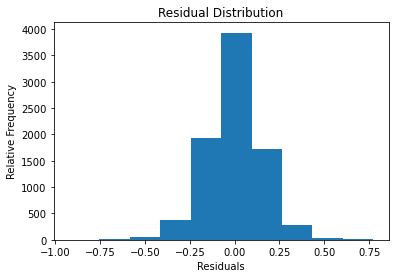

In [64]:
plt.hist(model.resid);
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Relative Frequency');

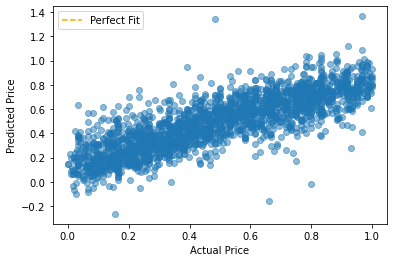

In [67]:
preds = model.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

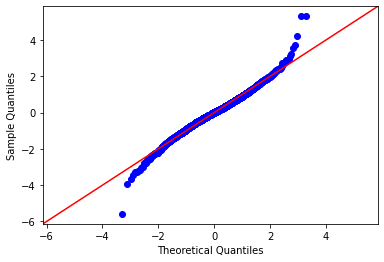

In [66]:
import statsmodels.api as sm
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

In [117]:
type(model.resid)

pandas.core.series.Series

In [119]:
model.resid.sort_values()

14821   -0.914931
19173   -0.803444
3840    -0.777596
11424   -0.750488
14841   -0.727323
           ...   
15643    0.662583
4664     0.692975
14354    0.696885
13616    0.768308
3657     0.775894
Length: 8352, dtype: float64